In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# constants
LABELS = ['Normal', 'Fraud']
RANDOM_SEED = 105
UPDATE_SIZE = 0.3
TEST_SIZE = 0.2
DATASET_PATH = Path('../creditcard.csv')

In [3]:
# data reading
df = pd.read_csv(DATASET_PATH)

In [4]:
# data preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# преобразуем данные, убираем колонку 'время', т.к. она ни на что не влияет
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# отделяем X от Y
Y = data['Class'].values
X = data.drop(['Class'], axis=1).values

# делим данные
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=UPDATE_SIZE, random_state=RANDOM_SEED, stratify=Y)

In [5]:
# количество мошенничеств в тестовых данных
sum(Y_test)

98

In [63]:
# Creating model
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=1000, n_jobs=-1)

In [64]:
# train model
model.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=-1, random_state=None, verbose=0, warm_start=False)

In [5]:
import joblib

file_name = 'IsolationForest_1000.pkl'

In [68]:
# saving model
with open(file_name, 'wb') as f:
    joblib.dump(model, f, compress=1)

In [6]:
# loading model
with open(file_name, 'rb') as f:
    model = joblib.load(file_name)

/home/izvyk/venv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.22.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/izvyk/venv/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator IsolationForest from version 0.22.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [43]:
import numpy as np

predictions = model.decision_function(X_test)

In [44]:
for i in range(len(predictions)):
    predictions[i] = (predictions[i] + 1) / -2

In [45]:
print(min(predictions))
print(max(predictions))

-0.5749864638148476
-0.38111381541281997


In [129]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, predictions)

0.5

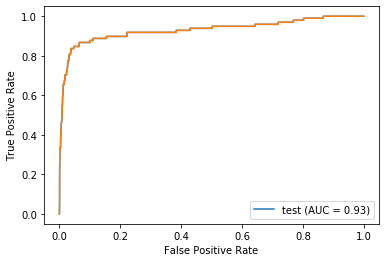

In [34]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)

viz = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=''
)
viz.plot(ax=None, name='test')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.show()

In [76]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, predictions)

In [66]:
for i in range(len(recall)):
    recall[i] = -1 * recall[i] + 1

for i in range(len(precision)):
    precision[i] = -1 * precision[i] + 1

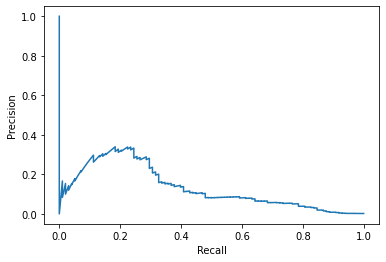

In [77]:
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.ylim([0.0, 1.05])
#plt.xlim([0.0, 1.0])
plt.plot(recall, precision)

In [75]:
from sklearn.metrics import average_precision_score


average_precision = average_precision_score(Y_test, predictions)
average_precision

0.13206398453017457